In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("../Chapter-7-Convolutional-Neural-Network/MNIST_data",one_hot=True)

Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data\train-images-idx3-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data\train-labels-idx1-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ../Chapter-7-Convolutional-Neural-Network/MNIST_data\t10k-labels-idx1-ubyte.gz


In [6]:
tf.reset_default_graph()

In [7]:
# 784 inputs
num_inputs = 784
# 392 hidden1
neurons_hid1 = 392
# 196 hidden2
neurons_hid2 = 196
# 392 hidden3
neurons_hid3 = neurons_hid1
# 784 outputs
num_outputs = num_inputs

In [9]:
learning_rate = 0.01

In [10]:
actf = tf.nn.relu

In [11]:
X =  tf.placeholder(tf.float32,shape=[None,num_inputs])

In [12]:
initializer = tf.variance_scaling_initializer()

In [13]:
w1 = tf.Variable(initializer([num_inputs,neurons_hid1]),dtype=tf.float32)
w2 = tf.Variable(initializer([neurons_hid1,neurons_hid2]),dtype=tf.float32)
w3 = tf.Variable(initializer([neurons_hid2,neurons_hid3]),dtype=tf.float32)
w4 = tf.Variable(initializer([neurons_hid3,num_outputs]),dtype=tf.float32)

In [14]:
b1 = tf.Variable(tf.zeros(neurons_hid1),dtype=tf.float32)
b2 = tf.Variable(tf.zeros(neurons_hid2),dtype=tf.float32)
b3 = tf.Variable(tf.zeros(neurons_hid3),dtype=tf.float32)
b4 = tf.Variable(tf.zeros(num_outputs),dtype=tf.float32)

In [15]:
act_func = tf.nn.relu

In [17]:
hid_layer1 = act_func(tf.matmul(X,w1)+b1)
hid_layer2 = act_func(tf.matmul(hid_layer1,w2)+b2)
hid_layer3 = act_func(tf.matmul(hid_layer2,w3)+b3)
output_layer = act_func(tf.matmul(hid_layer3,w4)+b4)

In [18]:
loss = tf.reduce_mean(tf.square(output_layer - X))

In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [20]:
train = optimizer.minimize(loss)

In [21]:
init = tf.global_variables_initializer()

In [22]:
saver = tf.train.Saver()

In [23]:
num_epochs = 5
batch_size = 150

In [25]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(num_epochs):
        
        num_batches = mnist.train.num_examples // batch_size
        
        for iteration in range(num_batches):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train,feed_dict={X:X_batch})
            
        training_loss = loss.eval(feed_dict={X:X_batch})
        
        print("EPOCH: {} LOSS: {}".format(epoch,training_loss))
    
    saver.save(sess,'./example_stacked_autoencoder.ckpt')

EPOCH: 0 LOSS: 0.03407088294625282
EPOCH: 1 LOSS: 0.02980184182524681
EPOCH: 2 LOSS: 0.03170352429151535
EPOCH: 3 LOSS: 0.031823739409446716
EPOCH: 4 LOSS: 0.03129424899816513


In [26]:
num_test_images = 10

with tf.Session() as sess:
    
    saver.restore(sess,'./example_stacked_autoencoder.ckpt')
    
    results = output_layer.eval(feed_dict={X:mnist.test.images[:num_test_images]})

INFO:tensorflow:Restoring parameters from ./example_stacked_autoencoder.ckpt


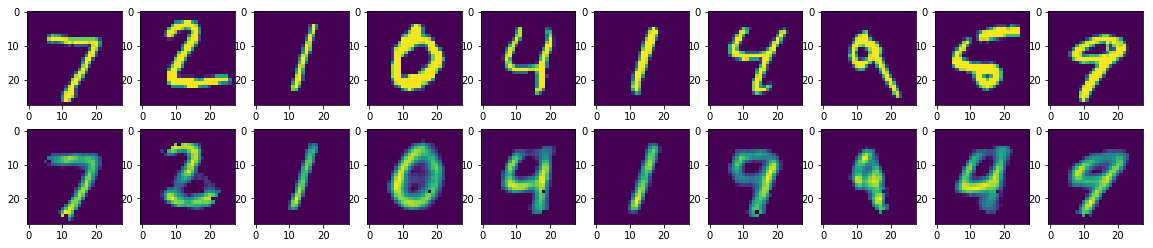

In [27]:
f,a = plt.subplots(2,10,figsize=(20,4))

for i in range(num_test_images):
    a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
    a[1][i].imshow(np.reshape(results[i],(28,28)))